<a href="https://colab.research.google.com/github/Betinsss/IQ-levels-analysis/blob/main/fproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2. Libraries and Data Handling


#Import Libraries


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.io as pio

#Uploading Csv file

In [ ]:
data = pd.read_csv('/content/08_IQ Levels Analysis.csv')

#Data Preprocessing

#.head()

In [ ]:
data.head()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,1,Hong Kong,106,1283.0,35304.0,26.2
1,2,Japan,106,1340.0,40964.0,19.2
2,3,Singapore,106,1428.0,41100.0,31.5
3,4,Taiwan,106,NaN,NaN,26.9
4,5,China,104,183.0,4654.0,19.1


#.tail()

In [ ]:
data.tail()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
103,104,Equatorial Guinea,56,NaN,7625.0,29.9
104,105,Gambia,55,14.0,648.0,32.9
105,106,Guatemala,55,92.0,2830.0,32.1
106,107,Sierra Leone,52,16.0,412.0,30.4
107,108,Nepal,51,22.0,595.0,24.6


#.shape

In [ ]:
data.shape

(108, 6)

#.columns

In [ ]:
data.columns

Index(['rank', 'country', 'IQ', 'education_expenditure', 'avg_income',
       'avg_temp'],
      dtype='object')

#.dtypes

In [ ]:
data.dtypes

rank                       int64
country                   object
IQ                         int64
education_expenditure    float64
avg_income               float64
avg_temp                 float64
dtype: object

#.unique()

In [ ]:
data["country"].unique()

array(['Hong Kong\xa0', 'Japan', 'Singapore', 'Taiwan\xa0', 'China',
       'South Korea', 'Netherlands', 'Finland', 'Canada', 'North Korea',
       'Luxembourg', 'Macao\xa0', 'Germany', 'Switzerland', 'Estonia',
       'Australia', 'United Kingdom', 'Greenland\xa0', 'Iceland',
       'Austria', 'Hungary', 'New Zealand', 'Belgium', 'Norway', 'Sweden',
       'Denmark', 'Cambodia', 'France', 'United States', 'Poland',
       'Czechia', 'Russia', 'Spain', 'Ireland', 'Italy', 'Croatia',
       'Lithuania', 'Israel', 'Mongolia', 'Portugal', 'Bermuda\xa0',
       'Bulgaria', 'Greece', 'Ukraine', 'Vietnam', 'Kazakhstan',
       'Malaysia', 'Myanmar', 'Thailand', 'Serbia', 'Brunei', 'Chile',
       'Costa Rica', 'Iraq', 'Romania', 'Argentina', 'Mauritius',
       'Mexico', 'Turkey', 'Georgia', 'Sri Lanka', 'Montenegro', 'Cuba',
       'Brazil', 'Philippines', 'Colombia', 'Laos', 'Venezuela',
       'Albania', 'United Arab Emirates', 'Dominican Republic',
       'Puerto Rico\xa0', 'Afghanistan

#.nunique()

In [ ]:
data.nunique()

rank                     108
country                  108
IQ                        40
education_expenditure     97
avg_income               106
avg_temp                  91
dtype: int64

#.describe()

In [ ]:
data.describe()

,rank,IQ,education_expenditure,avg_income,avg_temp
count,108.00000,108.000000,103.000000,106.000000,108.000000
mean,54.50000,85.972222,903.058252,17174.650943,23.858333
std,31.32092,12.998532,1166.625835,20871.092773,8.392232
min,1.00000,51.000000,1.000000,316.000000,0.400000
25%,27.75000,78.750000,81.500000,2263.250000,17.250000
50%,54.50000,88.000000,336.000000,7533.000000,25.850000
75%,81.25000,97.000000,1360.000000,30040.000000,31.275000
max,108.00000,106.000000,5436.000000,108349.000000,36.500000


#.value_counts

In [ ]:
data["country"].value_counts()

country
Hong Kong     1
Albania       1
Bolivia       1
Qatar         1
Oman          1
             ..
Spain         1
Russia        1
Czechia       1
Poland        1
Nepal         1
Name: count, Length: 108, dtype: int64

#Handling Missing Values


#.isnull()

In [ ]:
data.isnull()

,rank,country,IQ,education_expenditure,avg_income,avg_temp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,True,True,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
103,False,False,False,True,False,False
104,False,False,False,False,False,False
105,False,False,False,False,False,False
106,False,False,False,False,False,False


#Handling Categorical Data


In [ ]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

# Label Encoding for ordinal categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# One-Hot Encoding for nominal categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols)


Index(['country'], dtype='object')


#Data Normalization/Standardization (if needed)


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization (mean=0, variance=1)
scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Normalization (range 0-1)
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


# Impute missing values for numerical columns

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', or 'constant' strategies
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# If there are non-numeric columns, we need to concatenate them back after imputation
non_numeric_data = data.select_dtypes(exclude=[np.number])
data_imputed = pd.concat([data_imputed, non_numeric_data], axis=1)

#3. Data Analysis Techniques

#Descriptive Statistics


In [ ]:
# Display basic descriptive statistics
print(data_imputed.describe())

# Additional descriptive statistics
print("Mean:\n", data_imputed.mean())
print("Median:\n", data_imputed.median())
print("Standard Deviation:\n", data_imputed.std())
print("Variance:\n", data_imputed.var())
print("Skewness:\n", data_imputed.skew())
print("Kurtosis:\n", data_imputed.kurt())


            rank    country          IQ  education_expenditure     avg_income  \
count  108.00000  108.00000  108.000000             108.000000     108.000000   
mean    54.50000   53.50000   85.972222             903.058252   17174.650943   
std     31.32092   31.32092   12.998532            1139.042128   20675.115731   
min      1.00000    0.00000   51.000000               1.000000     316.000000   
25%     27.75000   26.75000   78.750000              90.000000    2307.750000   
50%     54.50000   53.50000   88.000000             411.000000    7605.500000   
75%     81.25000   80.25000   97.000000            1297.250000   29838.000000   
max    108.00000  107.00000  106.000000            5436.000000  108349.000000   

         avg_temp  
count  108.000000  
mean    23.858333  
std      8.392232  
min      0.400000  
25%     17.250000  
50%     25.850000  
75%     31.275000  
max     36.500000  
Mean:
 rank                        54.500000
country                     53.500000
IQ     

#Inferential Statistics
##Perform a t-test to compare IQ levels based on education expenditure.

In [ ]:
from scipy.stats import ttest_ind

# Divide the data based on median education expenditure
median_education_expenditure = data_imputed['education_expenditure'].median()
high_education_expenditure = data_imputed[data_imputed['education_expenditure'] > median_education_expenditure]['IQ']
low_education_expenditure = data_imputed[data_imputed['education_expenditure'] <= median_education_expenditure]['IQ']

# Perform t-test
t_stat, p_value = ttest_ind(high_education_expenditure, low_education_expenditure)
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: 7.229563744144697, P-value: 7.845406907643669e-11


#Predictive Model
##Build a linear regression model to predict IQ based on education expenditure, average income, and average temperature.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define the feature set and target variable
X = data_imputed[['education_expenditure', 'avg_income', 'avg_temp']]
y = data_imputed['IQ']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 68.31731478151806
R^2 Score: 0.5670230940412904


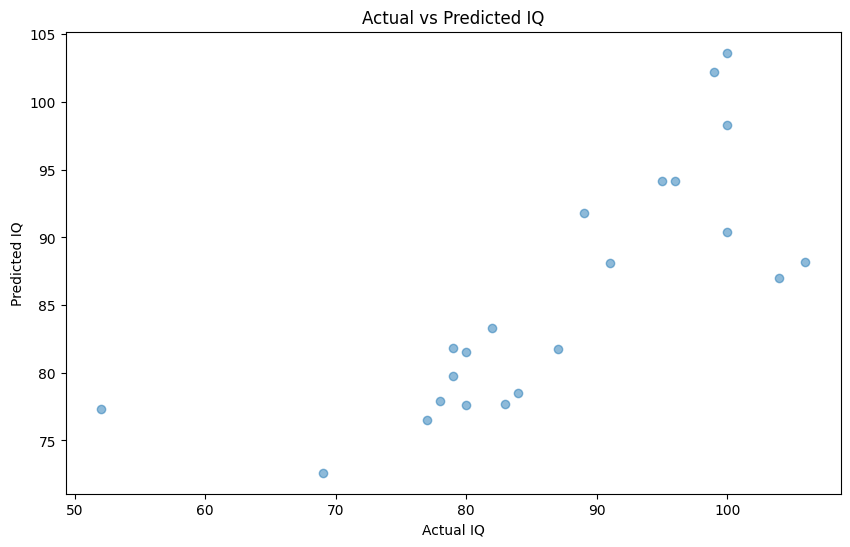

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual IQ')
plt.ylabel('Predicted IQ')
plt.title('Actual vs Predicted IQ')
plt.show()

Insights from the Model

Mean Squared Error (MSE): This metric tells us how close the predicted values are to the actual values. A lower MSE indicates a better fit.

R^2 Score: The R^2 score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables. An R^2 score close to 1 indicates a good fit.

The scatter plot of actual vs. predicted IQ values helps visualize the performance of the model. Points close to the diagonal line indicate good predictions, while points far from the line indicate errors.

#4. Visual Insights

#Visualization

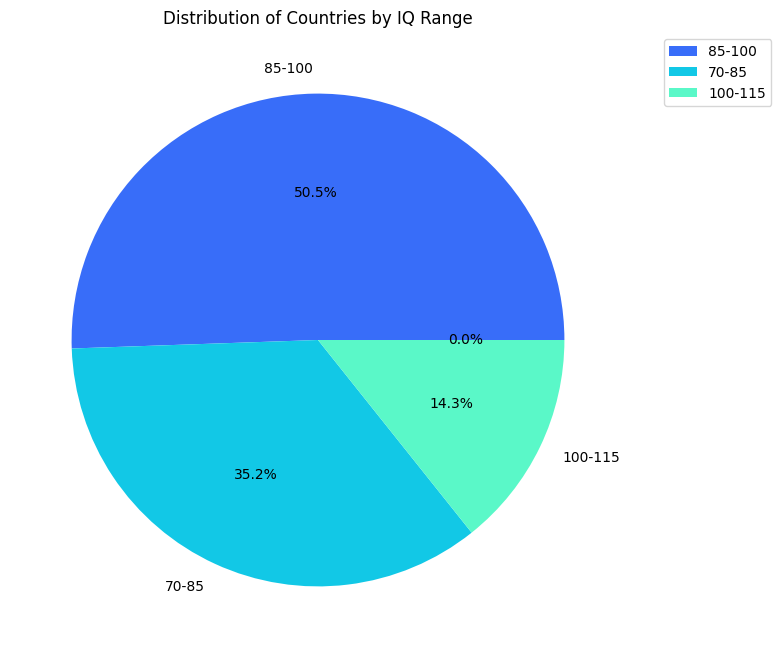

In [ ]:
# Create IQ ranges
bins = [70, 85, 100, 115, 130]
labels = ['70-85', '85-100', '100-115', '115-130']

data['IQ_range'] = pd.cut(data['IQ'], bins=bins, labels=labels, right=False)

# Pie Chart: Distribution of Countries by IQ Range
iq_range_distribution = data['IQ_range'].value_counts()
plt.figure(figsize=(8, 8))
iq_range_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('rainbow'))
plt.title('Distribution of Countries by IQ Range')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('')
plt.show()


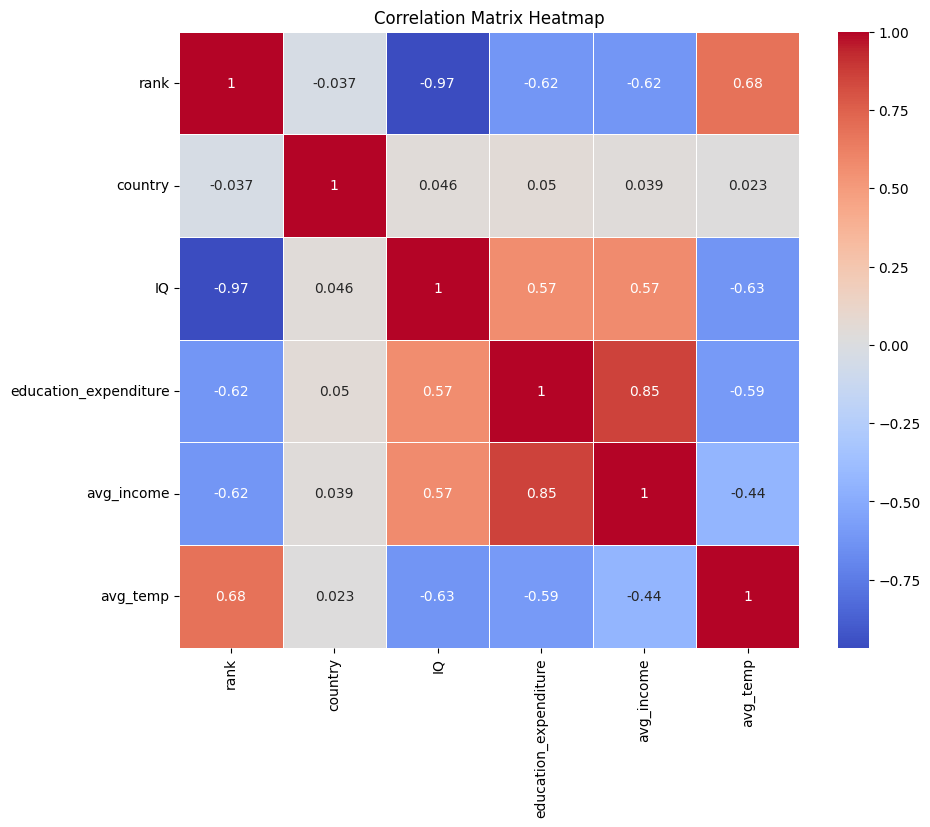

In [ ]:
# Heatmap: Correlation Between Variables
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns for the heatmap
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()



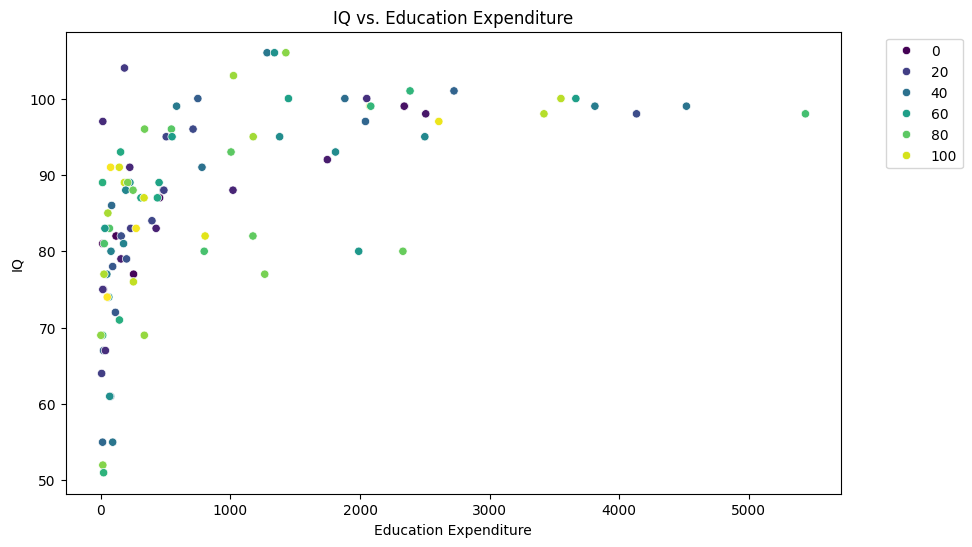

In [ ]:
# Scatter Plot: IQ vs. Education Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education_expenditure', y='IQ', data=data, hue='country', palette='viridis')
plt.title('IQ vs. Education Expenditure')
plt.xlabel('Education Expenditure')
plt.ylabel('IQ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


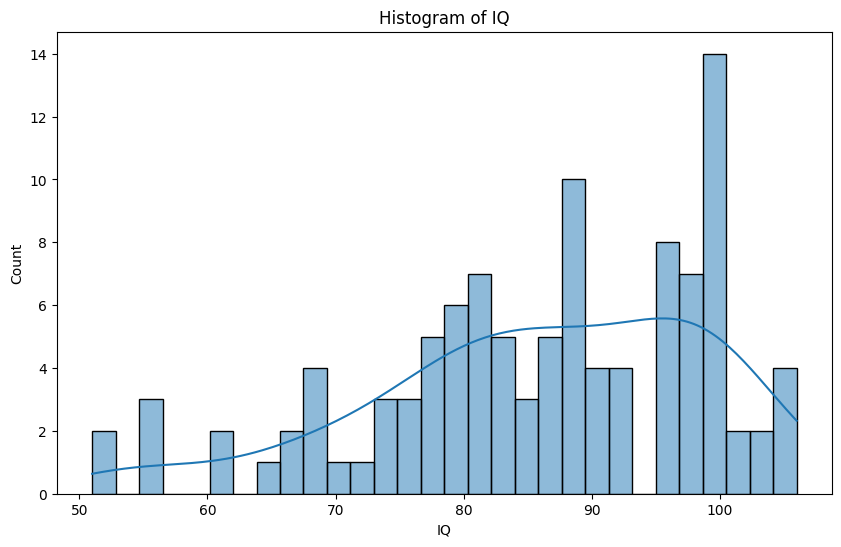

In [ ]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['IQ'], bins=30, kde=True)
plt.title('Histogram of IQ')
plt.show()




In [ ]:
fig = px.histogram(data, x="IQ", title="Distribution of IQ Scores")
fig.update_traces(marker=dict(color='purple'))
fig.show()

In [ ]:
fig = px.scatter(data, x="avg_temp", y="IQ", title="Correlation between Temperature and IQ")
fig.update_traces(marker=dict(color='green'))
fig.show()

In [ ]:
fig = px.bar(data, x="rank", y=["IQ", "avg_income", "education_expenditure"], title="Patterns Based on Country Rank")
fig.show()

In [ ]:
fig = px.histogram(data, x="avg_income", title="Distribution of Average Income")
fig.update_traces(marker=dict(color='pink'))
fig.show()

In [ ]:
fig = px.histogram(data, x="education_expenditure", title="Distribution of Education Expenditure")
fig.show()

In [ ]:
fig = px.scatter(data, x="education_expenditure", y="IQ", title="Influence of Education Expenditure on IQ")
fig.update_traces(marker=dict(color='red'))
fig.show()

In [ ]:
fig = px.bar(data, x="rank", y="education_expenditure", title="Relationship Between Rank and Education Expenditure")
fig.update_traces(marker=dict(color='purple'))
fig.show()

<ipython-input-112-e5ec4095bd27>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



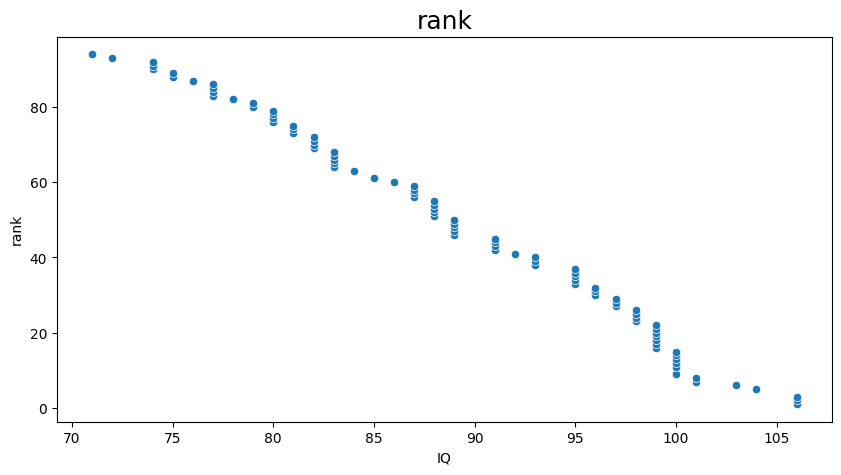

<ipython-input-112-e5ec4095bd27>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



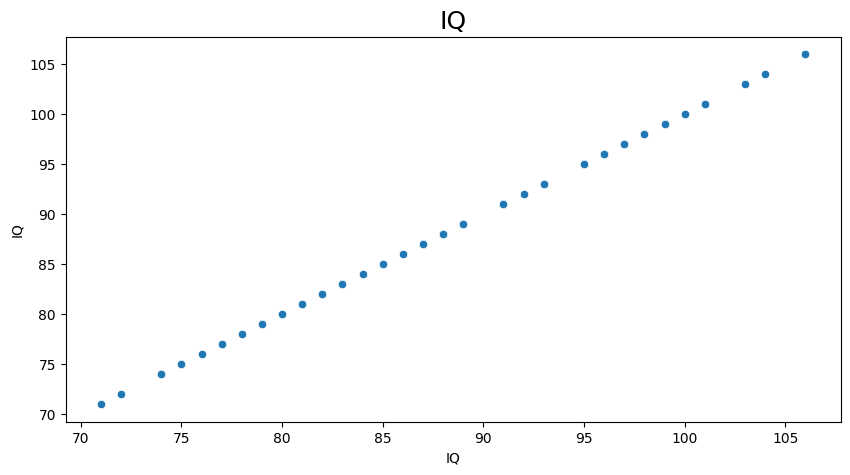

<ipython-input-112-e5ec4095bd27>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



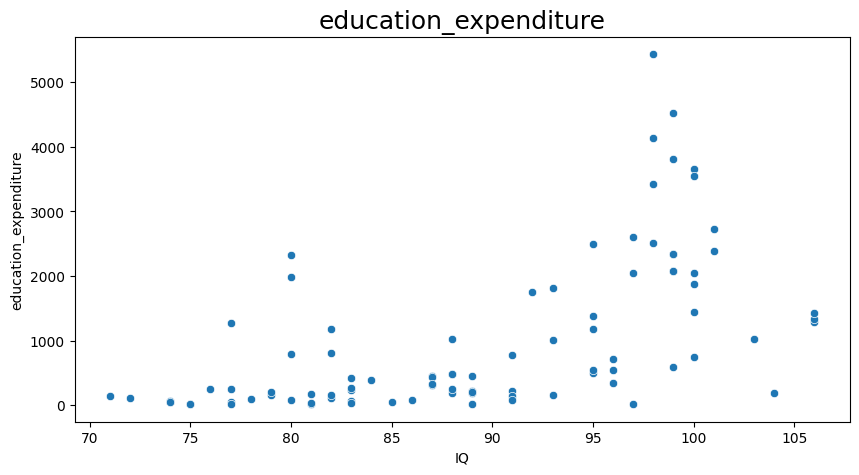

<ipython-input-112-e5ec4095bd27>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



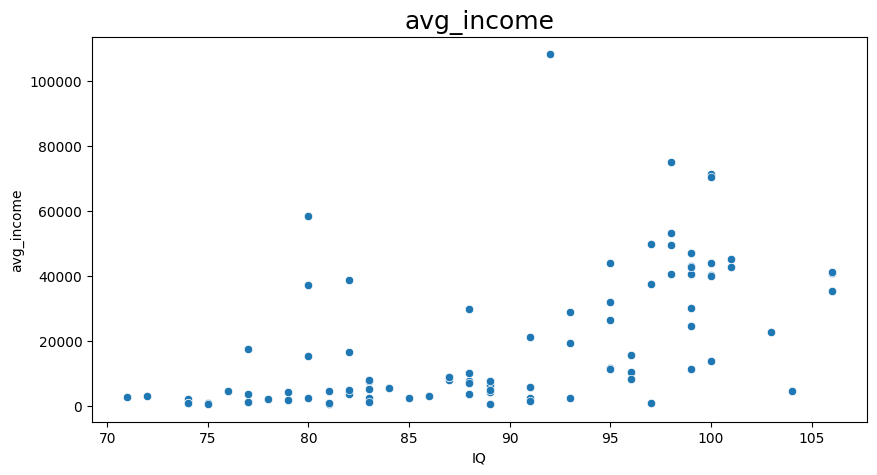

<ipython-input-112-e5ec4095bd27>:10: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



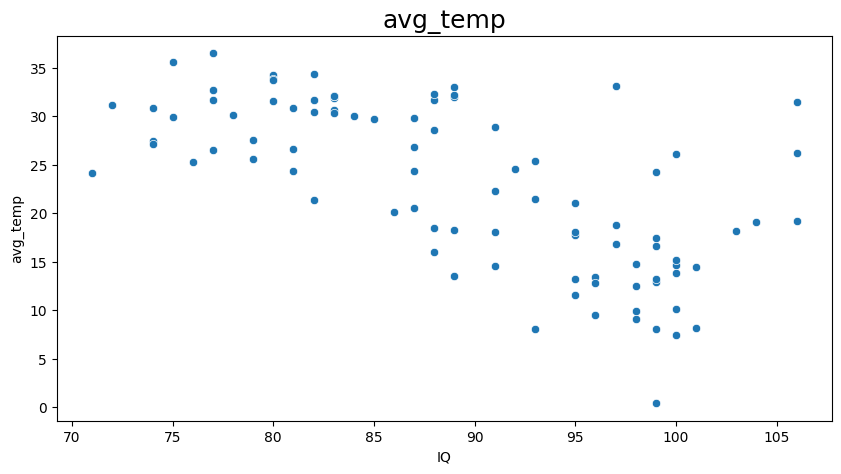

In [ ]:
for i in cols:

    if i == 'IQ':
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.scatterplot(data=data, x="IQ", y="IQ", palette="rainbow")
        plt.title("IQ", fontsize = 18)
        plt.show()
    else:
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.scatterplot(data=data, x="IQ", y= i, palette="Set2")
        plt.title(i, fontsize = 18)
        plt.show()

Insights from Visualizations
Bar Chart: Average IQ by Country

This chart highlights the countries with the highest and lowest average IQ levels. It provides insights into regional variations in IQ levels and can help identify countries that may benefit from educational reforms or further study.
Pie Chart: Distribution of Countries by IQ Range

The pie chart shows the proportion of countries within different IQ ranges. This helps in understanding the distribution of IQ levels across countries and identifying common IQ ranges.
Heatmap: Correlation Between Variables

The heatmap reveals correlations between different variables such as IQ, education expenditure, average income, and average temperature. Identifying strong correlations can suggest potential areas for policy focus or further investigation.
Scatter Plot: IQ vs. Education Expenditure

The scatter plot visualizes the relationship between IQ and education expenditure. It helps in understanding if there is a positive or negative association between these variables and identifies any outliers or patterns.